In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os # to read files and data structure
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip' #filtered dataset frpm kaggle original dataset is from microsoft research
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 2s 0us/step


In [6]:
zip_dir_base = os.path.dirname(zip_dir) 
!find $zip_dir_base -type d -print #terminal command fro finding our directories

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [7]:
#assigning proper variables
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') #directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') #directory with our training dogs pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') #directory with our validation cats pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # directory with our validation dogs pictures

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
BATCH_SIZE = 100 # Number of training examples to process before updating Our models Variable
IMG_SHAPE = 150 # Our training data consistes of images with width of 150 pixels & hieght of 150 pixels

In [11]:
train_image_generator = ImageDataGenerator(rescale=1./255) #generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) #generator for our validation data

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE, IMG_SHAPE),
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory = validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [15]:
sample_training_images, _ = next(train_data_gen) # The next function returns a batch from the dataset.
                                 # One batch is a tuple of (many images,many labels).For right now, we're discarding the labels and only using the images)

In [19]:
# This will plot the images in a grid with 1 row and 5 columns where images are placed in each column
def plotImages(image_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

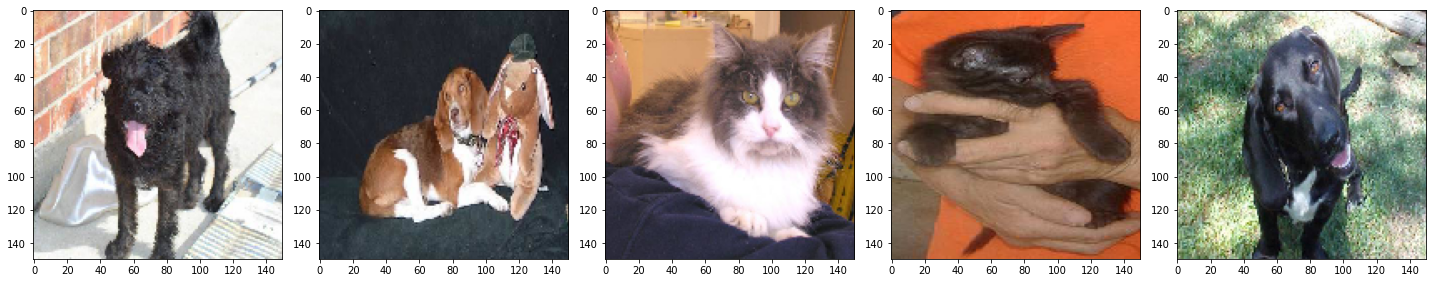

In [20]:
plotImages(sample_training_images[:5]) #for images[0 - 4]

Model Creation

In [23]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3),  activation='relu', input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(2)
])

In [25]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       1

In [27]:
#model Training
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data =val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 10s 492ms/step - loss: 0.7529 - accuracy: 0.5075 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 10s 481ms/step - loss: 0.6940 - accuracy: 0.5155 - val_loss: 0.6926 - val_accuracy: 0.5330
Epoch 3/100
20/20 [==============================] - 10s 475ms/step - loss: 0.6894 - accuracy: 0.5535 - val_loss: 0.6913 - val_accuracy: 0.5050
Epoch 4/100
20/20 [==============================] - 10s 479ms/step - loss: 0.6728 - accuracy: 0.5840 - val_loss: 0.6491 - val_accuracy: 0.6460
Epoch 5/100
20/20 [==============================] - 10s 477ms/step - loss: 0.6403 - accuracy: 0.6225 - val_loss: 0.6137 - val_accuracy: 0.6600
Epoch 6/100
20/20 [==============================] - 10s 481ms/step - loss: 0.6052 - accuracy: 0.6730 - val_loss: 0.6402 - val_accuracy: 0.6260
Epoch 7/100
20/20 [==============================] - 10s 477ms/step - loss: 0.5667 - accuracy: 0.7160 - val_loss: 0.5747 - val_accuracy:

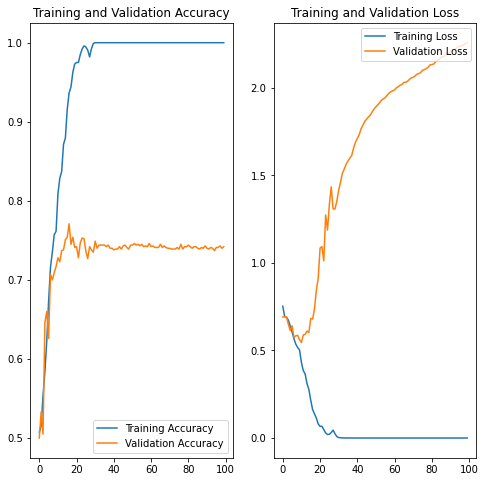

In [29]:
# data visualization
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

As we can see from the plots the validation accuracy and training accuracy are off my a large margin,  It only achieved 70% accuracy even after large number of epochs.

This clearly overfitting. Once the training and validation curves start to diverge, our model has started to memorize the training data and is unable to perform well on the validation data.
